# EDA

1. 전체적인 데이터 분석
- 분석의 목적과 목적에 맞는 변수가 무엇인지
- 데이터형 확인/데이터의 오류나 누락이 없는지
- 데이터를 구성하는 각 속성값이 예측한 범위와 분포를 갖는지 -> 아니라면 그 이유가 무엇인지 확인

2. 데이터의 개별 속성값 관찰
- 개별 데이터를 관찰하며 전체적인 추세와 특이사항 관찰
- 적절한 요약통계 지표 사용 (평균, 중앙값, 분산 등)
- 시각화를 통해 데이터의 개별 속성에 어떤 통계 지표가 적절한지 결정

3. 속성 간의 관계 분석
- 개별 속성 관찰에서 찾아내지 못했던 속성들의 조합, 패턴 발견
- 그래프를 통해 시각화하여 속성 간의 관계 분석
- 상관계수를 통한 상관관계 확인

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

train = pd.read_csv('../data/train.csv').drop(columns=['ID'])
train_X = train.drop(columns=['y'])
train_y = train['y']

In [68]:
# Step 1: Calculate the 75th percentile value of 'y'
percentile_75 = train['y'].quantile(0.90)

# Step 2: Filter the DataFrame
filtered_df = train[train['y'] >= percentile_75]


## 1. 전체적인 데이터 분석

In [69]:
print('데이터 정보')
train.info()

print('기본 통계량')
train.describe()

데이터 정보
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40118 entries, 0 to 40117
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x_0     40118 non-null  float64
 1   x_1     40118 non-null  float64
 2   x_2     40118 non-null  float64
 3   x_3     40118 non-null  float64
 4   x_4     40118 non-null  float64
 5   x_5     40118 non-null  float64
 6   x_6     40118 non-null  float64
 7   x_7     40118 non-null  float64
 8   x_8     40118 non-null  float64
 9   x_9     40118 non-null  float64
 10  x_10    40118 non-null  float64
 11  y       40118 non-null  float64
dtypes: float64(12)
memory usage: 3.7 MB
기본 통계량


,x_0,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,y
count,40118.000000,40118.000000,40118.000000,40118.000000,40118.000000,40118.000000,40118.000000,40118.000000,40118.000000,40118.000000,40118.000000,40118.000000
mean,1.047842,-2.204742,1.201854,0.868693,-0.277682,-1.775907,0.488336,-0.168241,0.653337,0.288575,0.078679,83.638201
std,0.040025,0.309915,0.036752,0.048606,0.039428,0.043249,0.015579,0.037058,0.037680,0.042907,0.023325,2.688992
min,0.907816,-2.548461,1.056123,0.741617,-0.581258,-1.817216,0.463784,-0.231485,0.574932,0.222945,-0.060792,16.677906
25%,1.028898,-2.427270,1.176222,0.832690,-0.285265,-1.805732,0.474365,-0.196759,0.622813,0.252706,0.074605,82.127003
50%,1.054757,-2.330303,1.212876,0.871334,-0.265732,-1.790160,0.488100,-0.174313,0.663973,0.281562,0.086375,83.281561
75%,1.076332,-2.061368,1.231058,0.908141,-0.255766,-1.760420,0.500362,-0.145610,0.688103,0.317799,0.093821,84.599644
max,1.112987,-0.971386,1.253528,0.964632,-0.243130,-1.545138,0.585086,-0.055259,0.700005,0.428381,0.097734,95.296179


In [70]:
train[1:2]

,x_0,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,y
1,1.024647,-2.472625,1.144386,0.846499,-0.287336,-1.756679,0.50386,-0.219545,0.697607,0.238306,0.081778,79.374109


In [71]:
print('결측치 확인')
train.isnull()

print('데이터 형식')
train.dtypes

결측치 확인
데이터 형식


x_0     float64
x_1     float64
x_2     float64
x_3     float64
x_4     float64
x_5     float64
x_6     float64
x_7     float64
x_8     float64
x_9     float64
x_10    float64
y       float64
dtype: object

## 2. 데이터 개별의 속성값 관찰

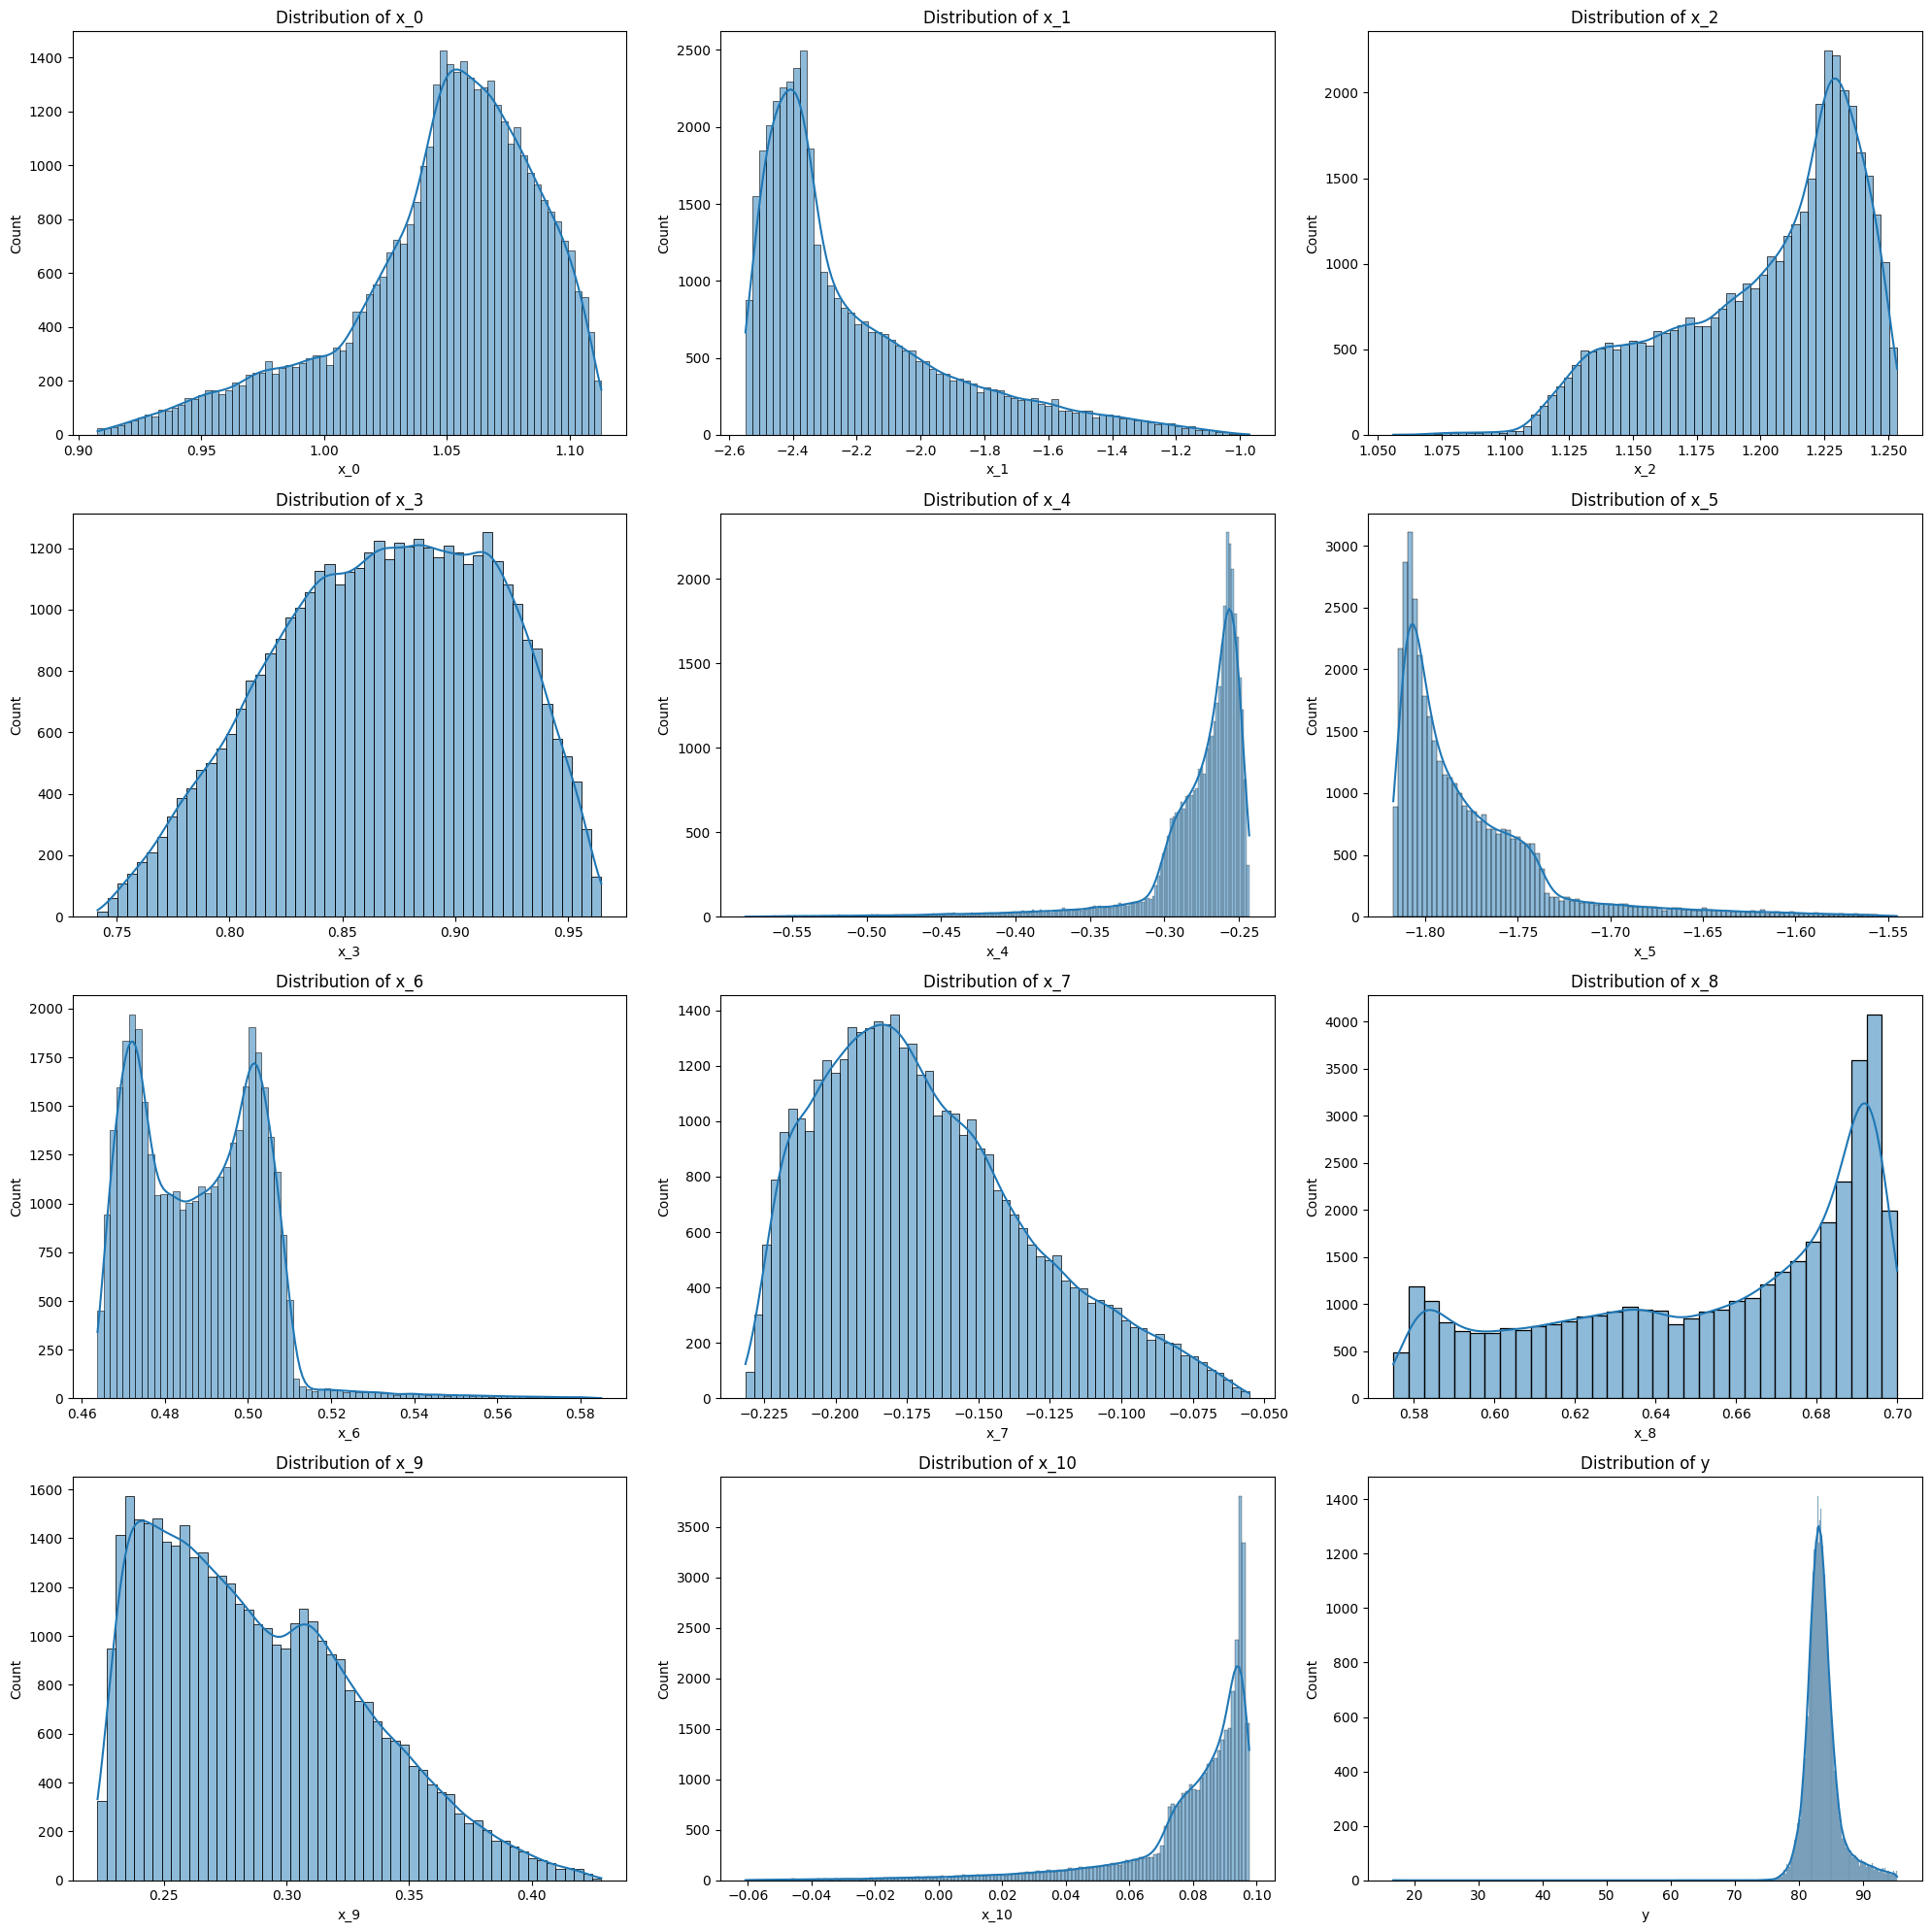

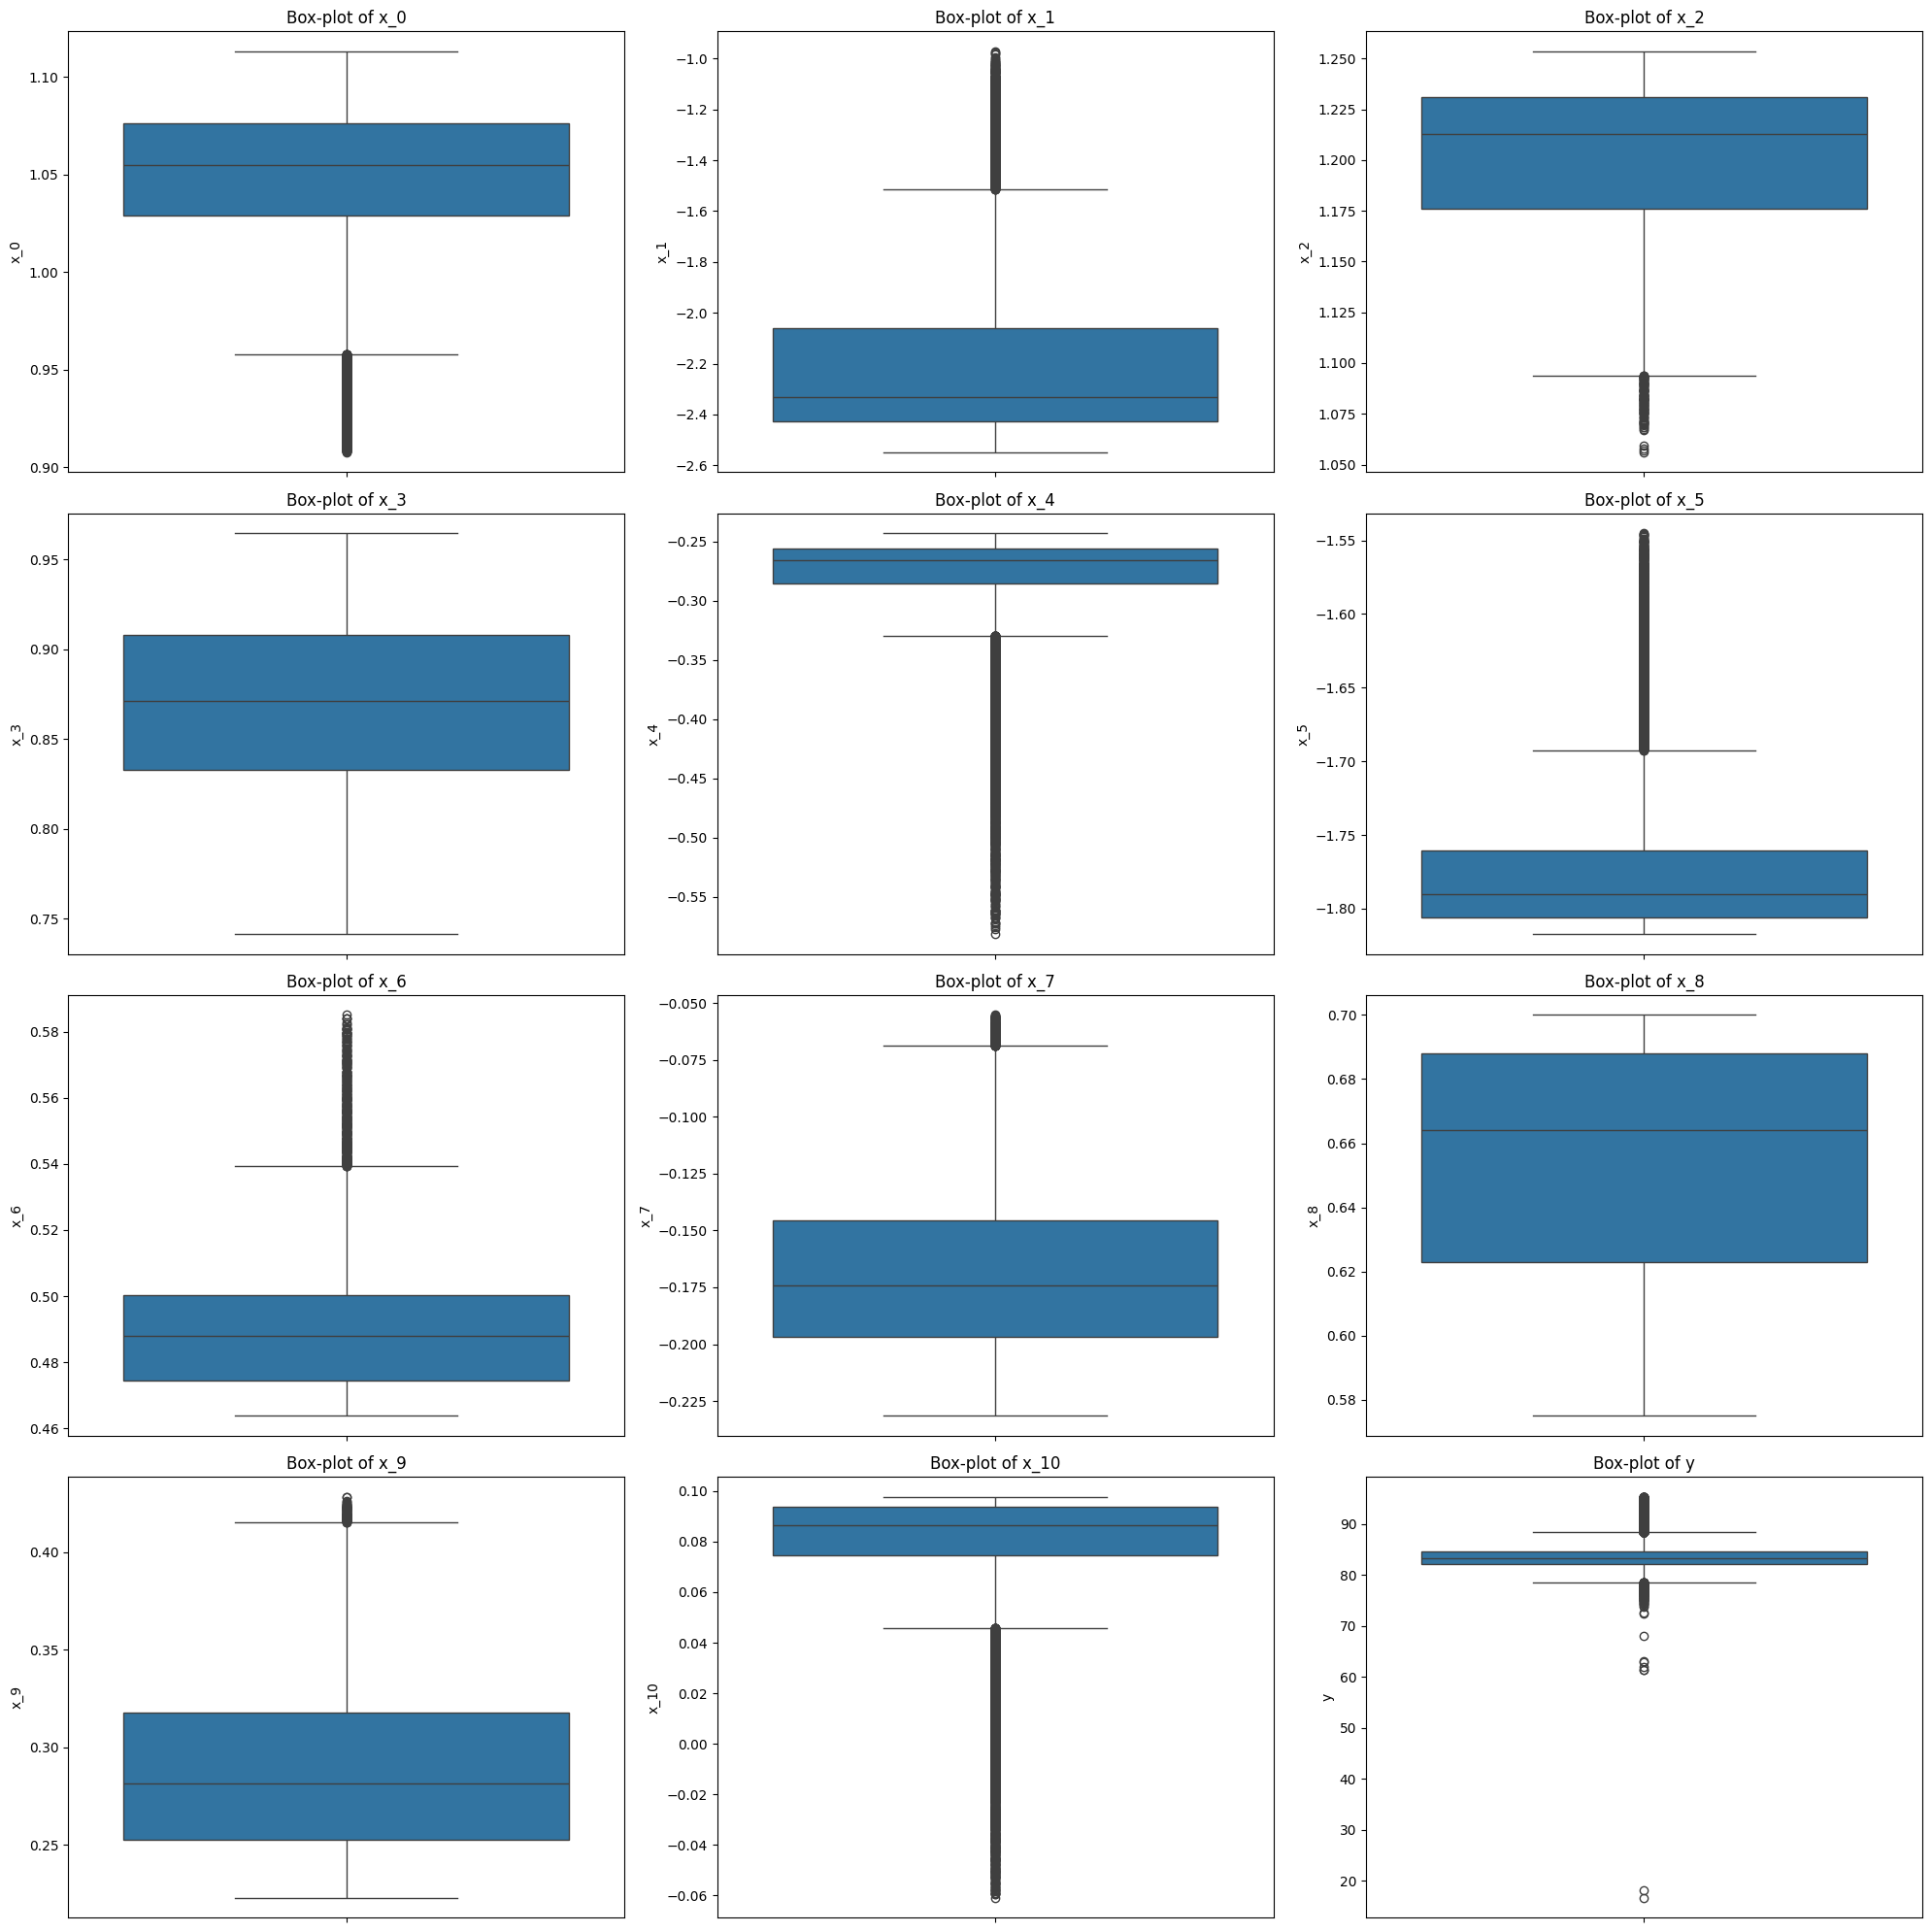

In [72]:
# create histograms for each variables
fig,axes = plt.subplots(4,3,figsize=(20,20))
axes = axes.ravel() #  Converts a two-dimensional array to a one-dimensional array

for i, col in enumerate(train):
    sns.histplot(train[col], ax= axes[i], kde=True)
    axes[i].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()
  
# create box-plots for each variable
fig,axes = plt.subplots(4,3,figsize=(20,20))
axes = axes.ravel()

for i, col in enumerate(train):
    sns.boxplot(y=train[col], ax= axes[i])
    axes[i].set_title(f'Box-plot of {col}')
    
plt.tight_layout()
plt.show()

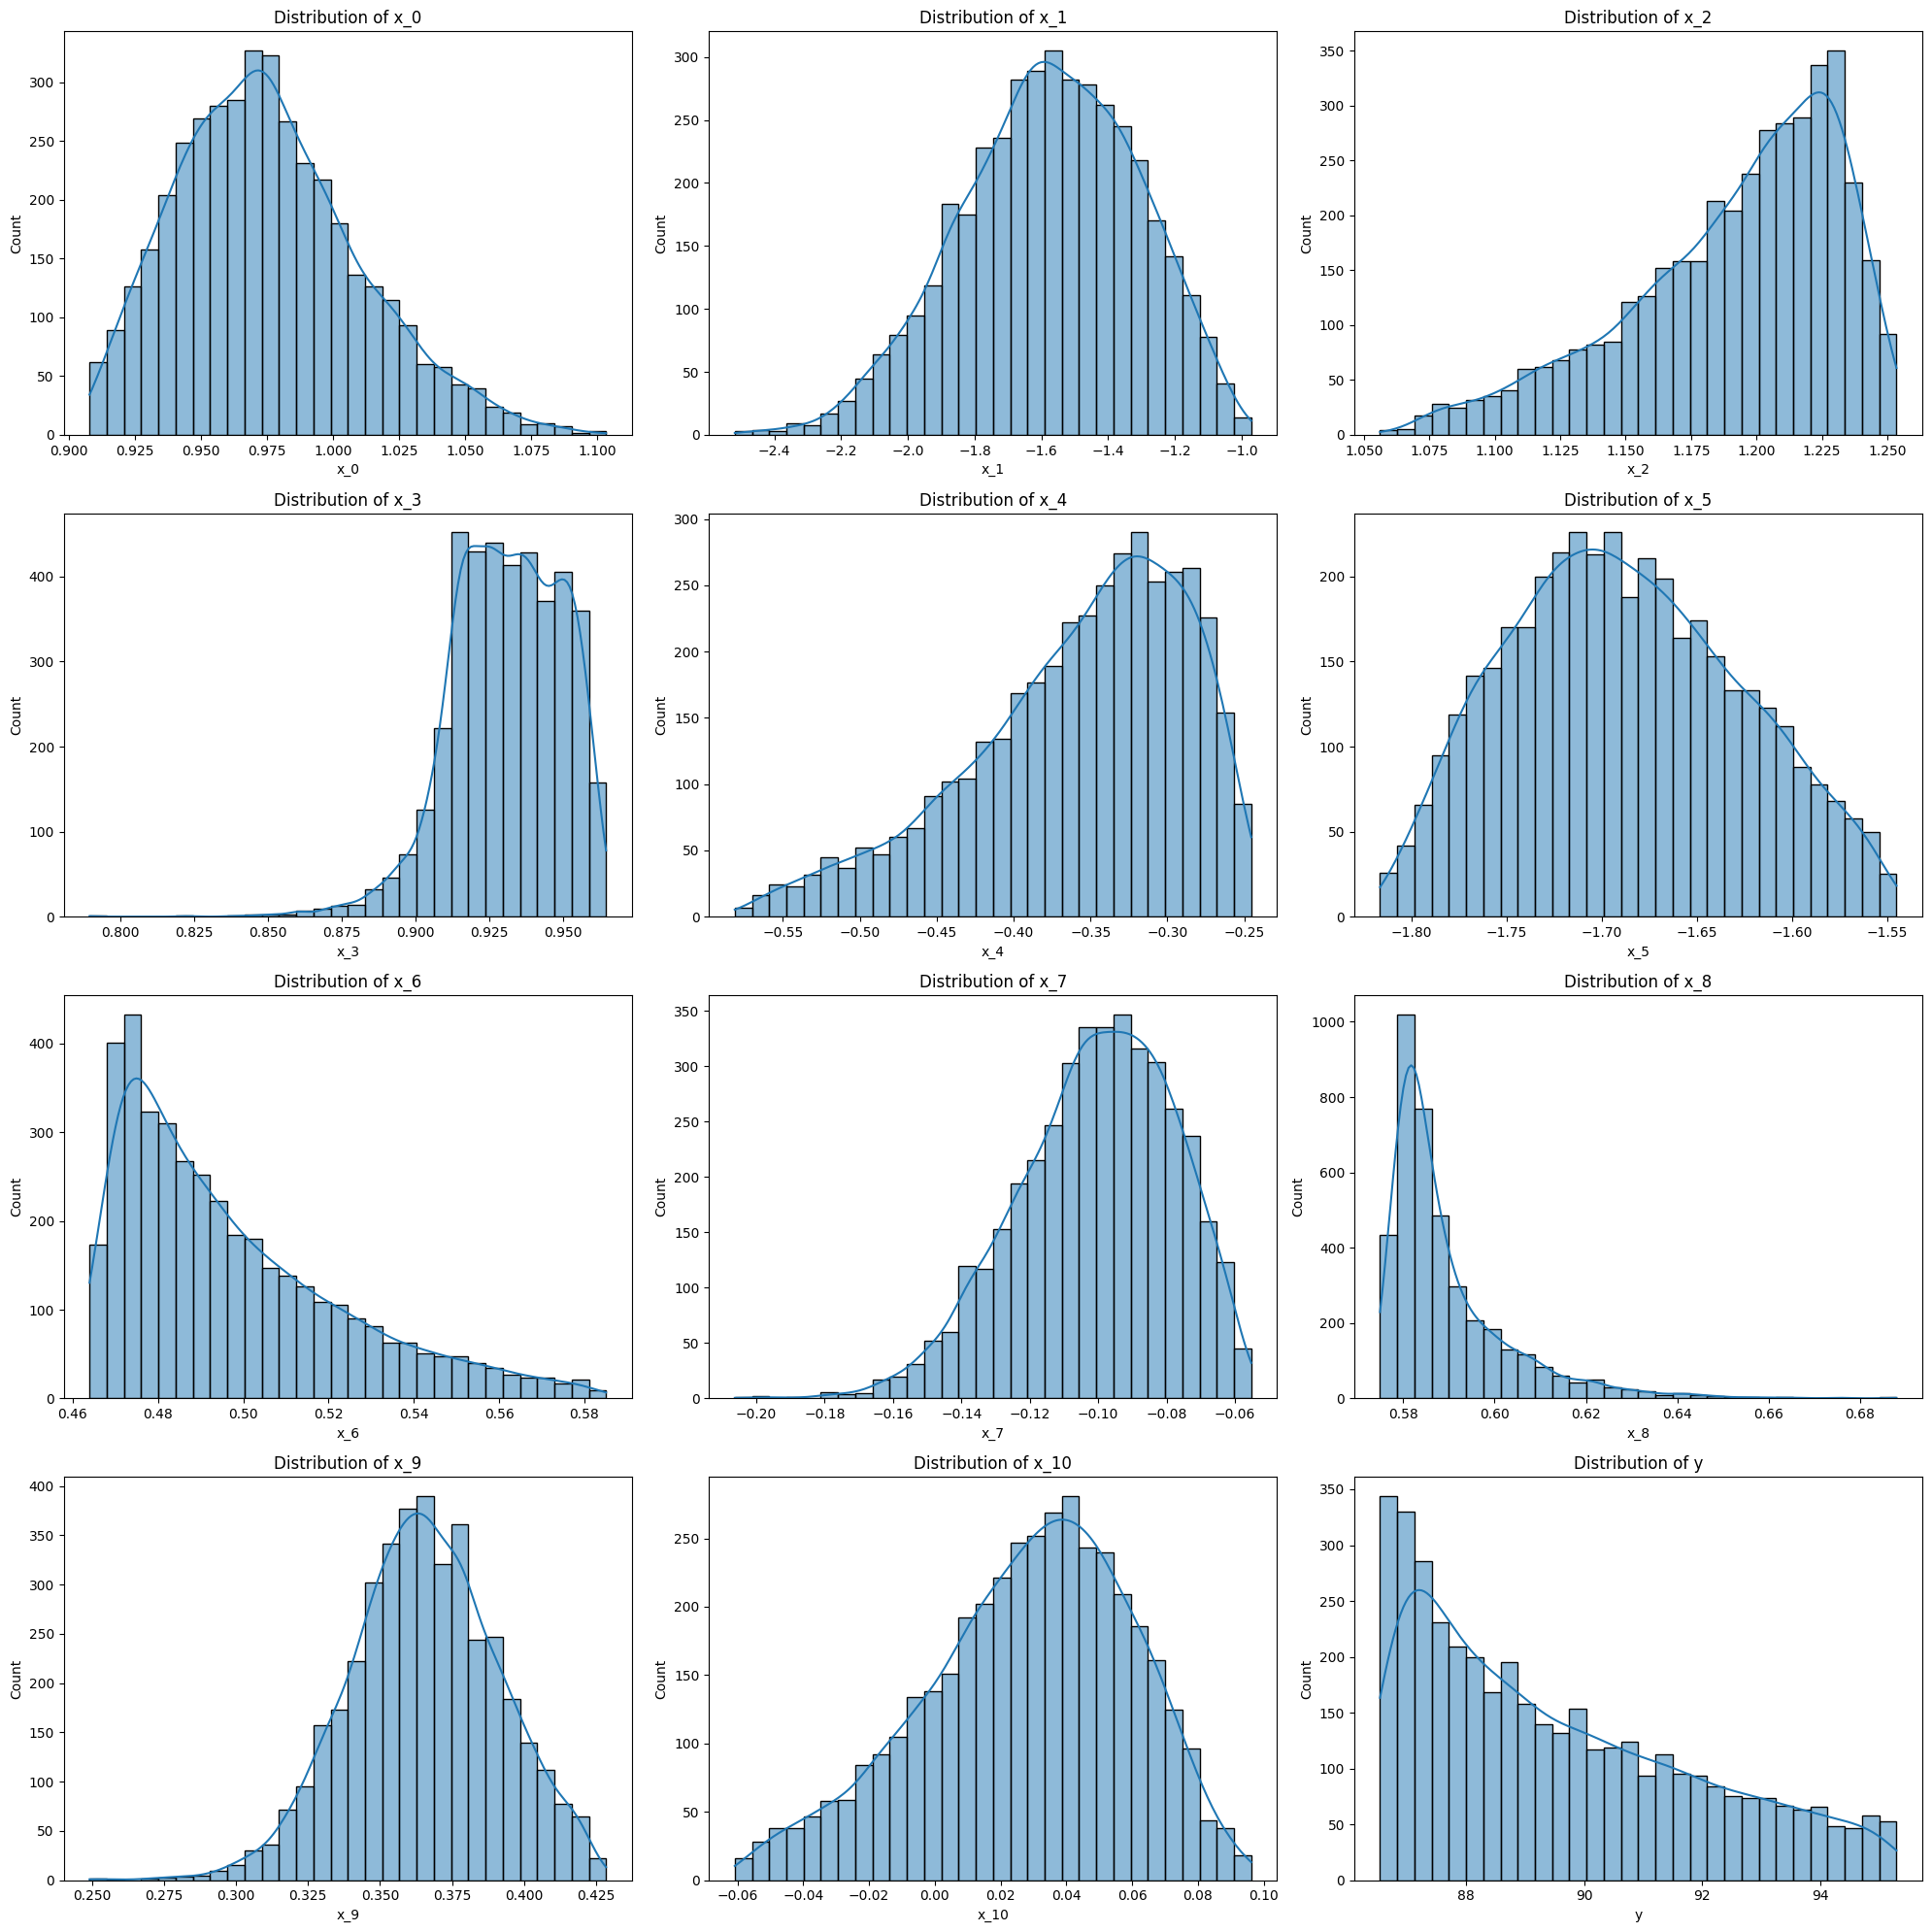

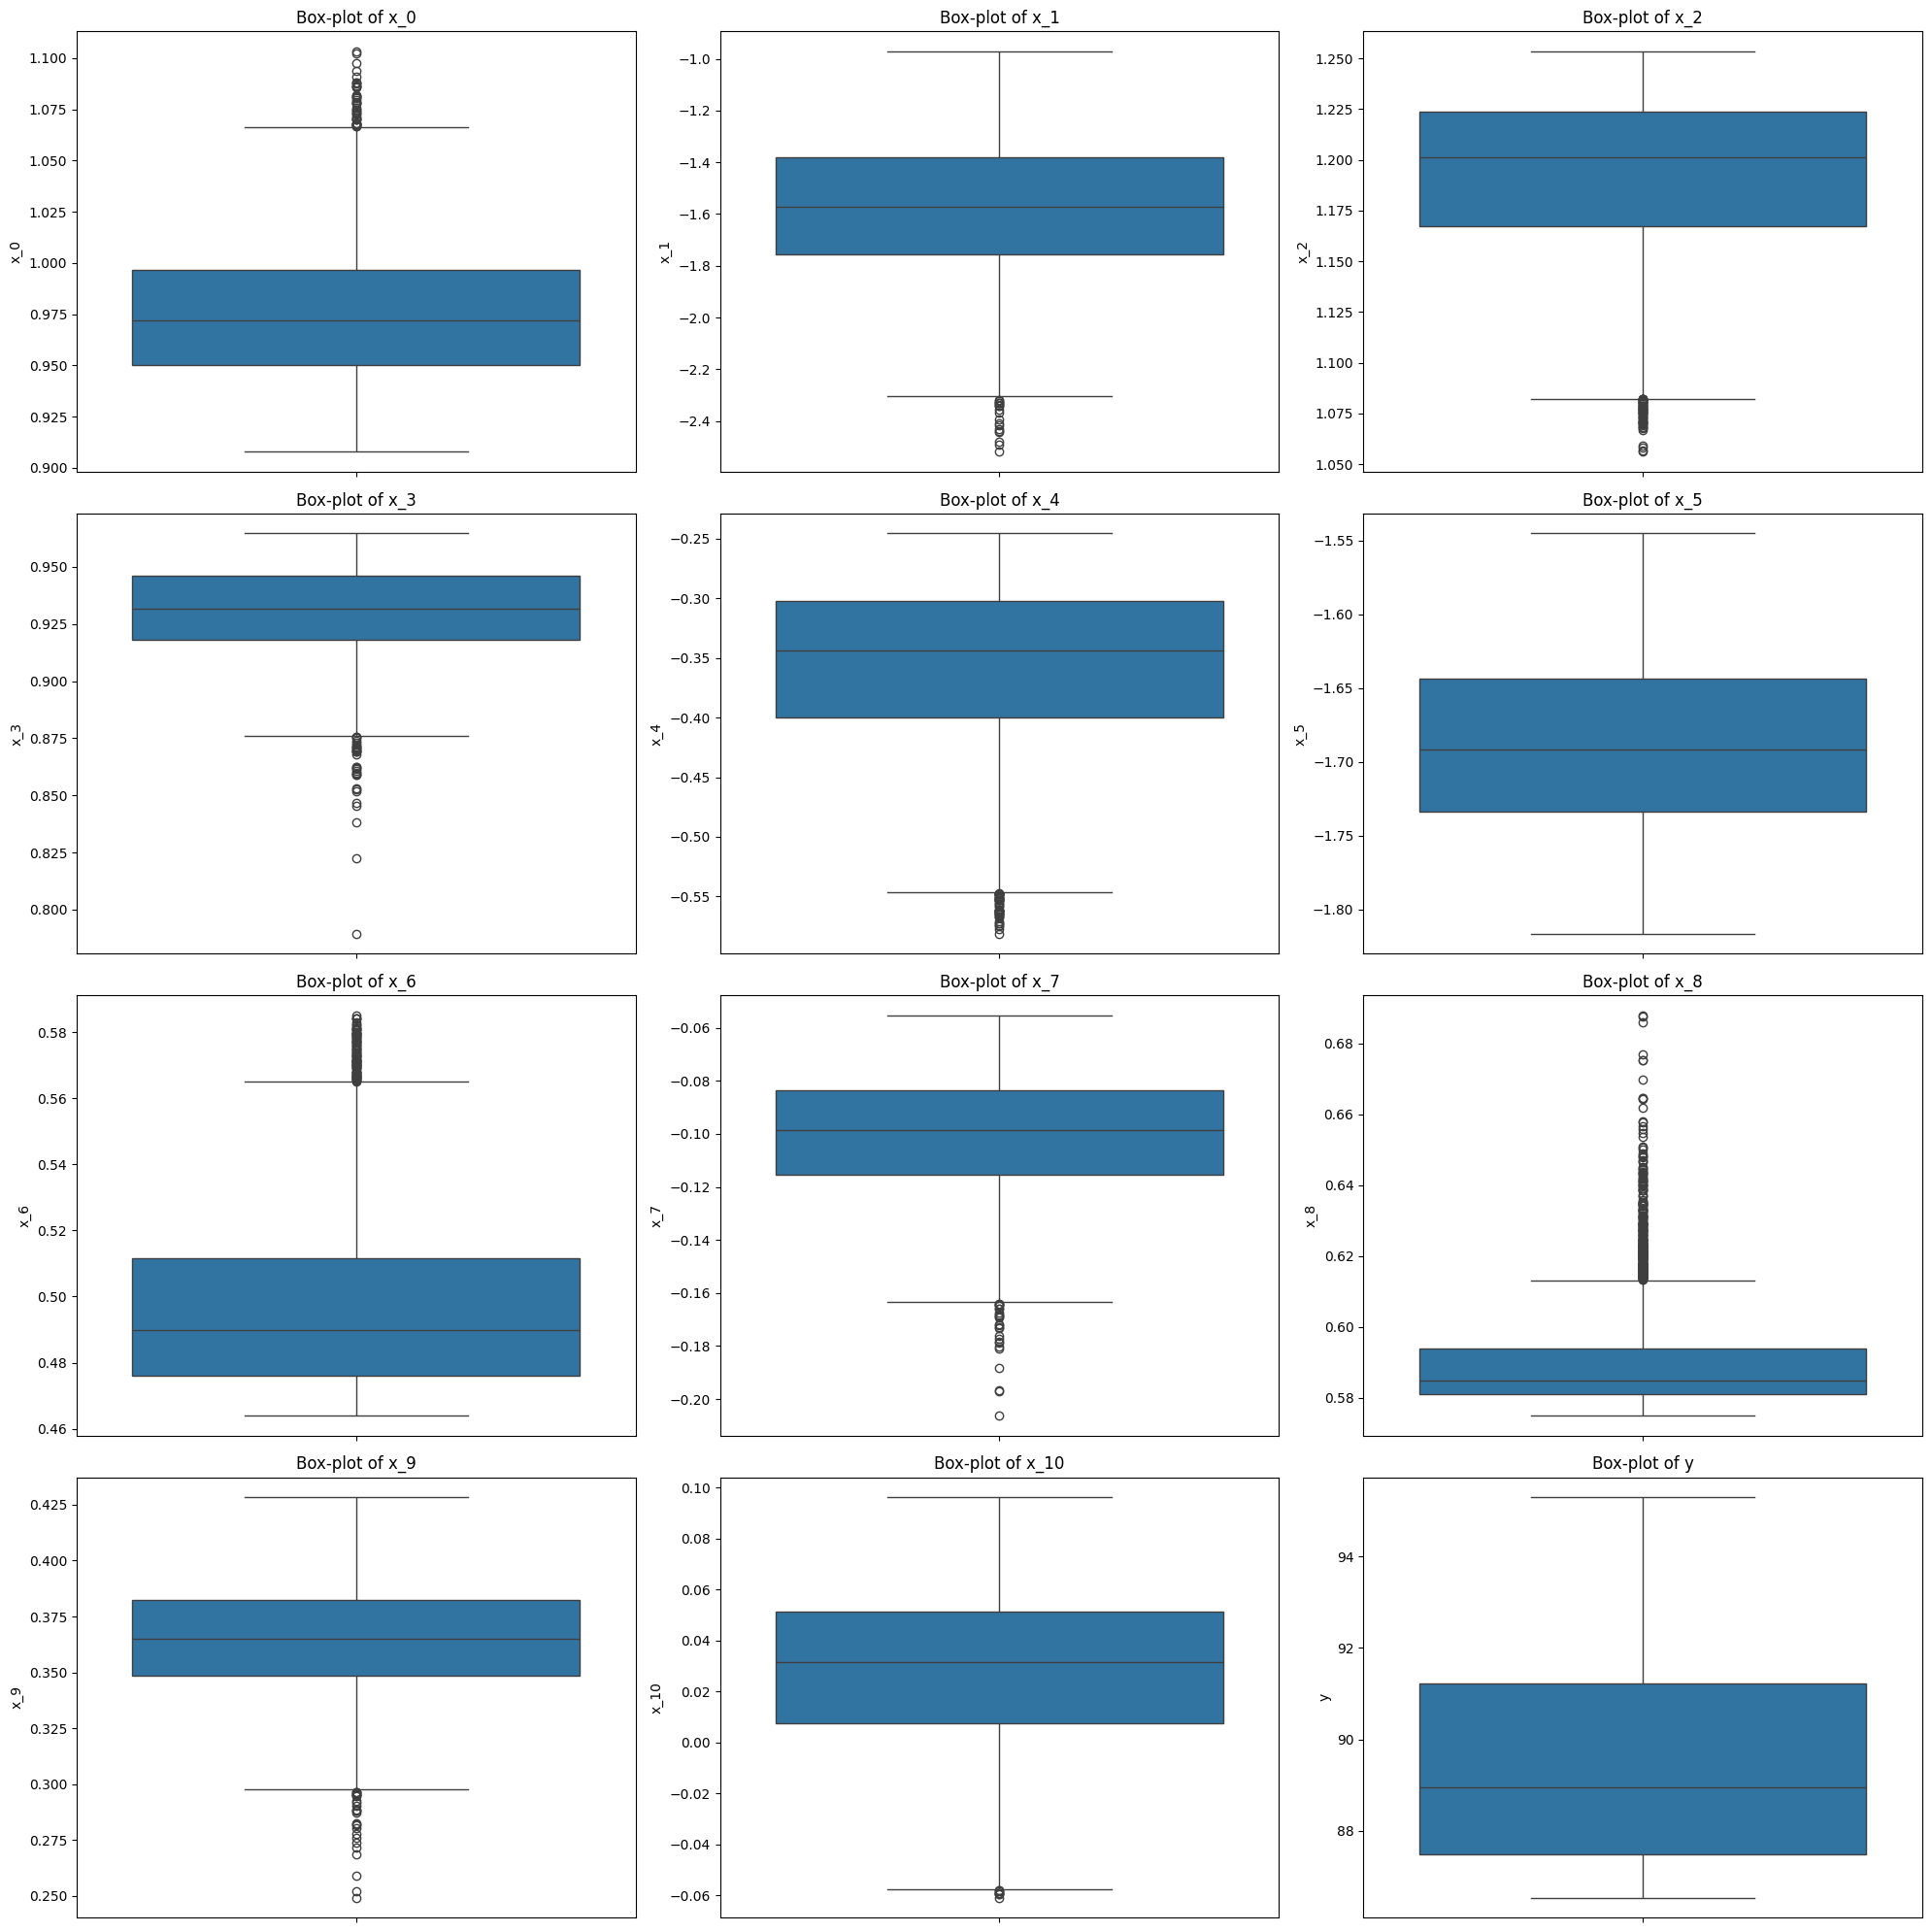

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'filtered_df' is the DataFrame where 'y' is in the upper 25 percent

# Create histograms for each variable in filtered_df
fig, axes = plt.subplots(4, 3, figsize=(20, 20))
axes = axes.ravel()  # Converts a two-dimensional array to a one-dimensional array

for i, col in enumerate(filtered_df.columns):
    sns.histplot(filtered_df[col], ax=axes[i], kde=True, bins=30)  # Adjust number of bins as needed
    axes[i].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

# Create box-plots for each variable in filtered_df
fig, axes = plt.subplots(4, 3, figsize=(20, 20))
axes = axes.ravel()

for i, col in enumerate(filtered_df.columns):
    sns.boxplot(y=filtered_df[col], ax=axes[i])
    axes[i].set_title(f'Box-plot of {col}')
    
plt.tight_layout()
plt.show()


## 3. 속성 간의 관계 분석 

X와 y의 상관 관계
x_10   -0.716420
x_8    -0.707139
x_0    -0.620384
x_4    -0.600099
x_6    -0.013633
x_2     0.118969
x_3     0.582873
x_5     0.609798
x_9     0.730894
x_7     0.733974
x_1     0.749408
y       1.000000
Name: y, dtype: float64


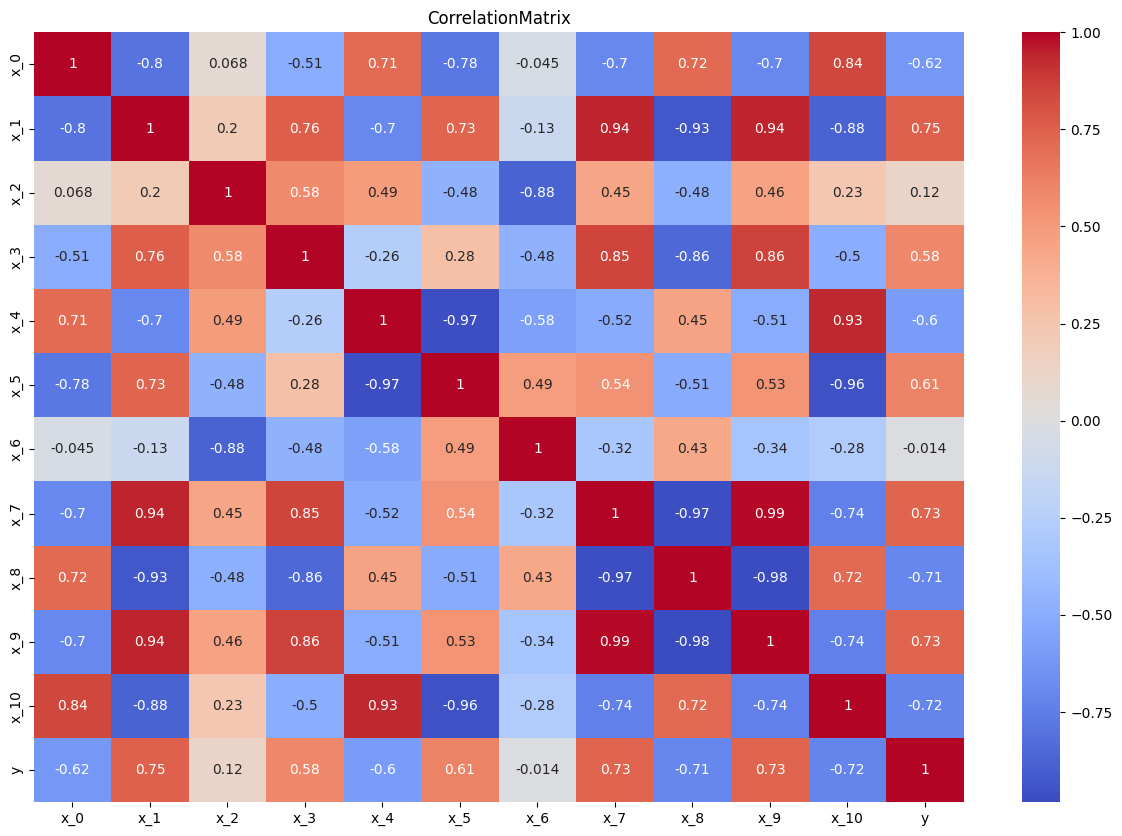

KeyboardInterrupt: 

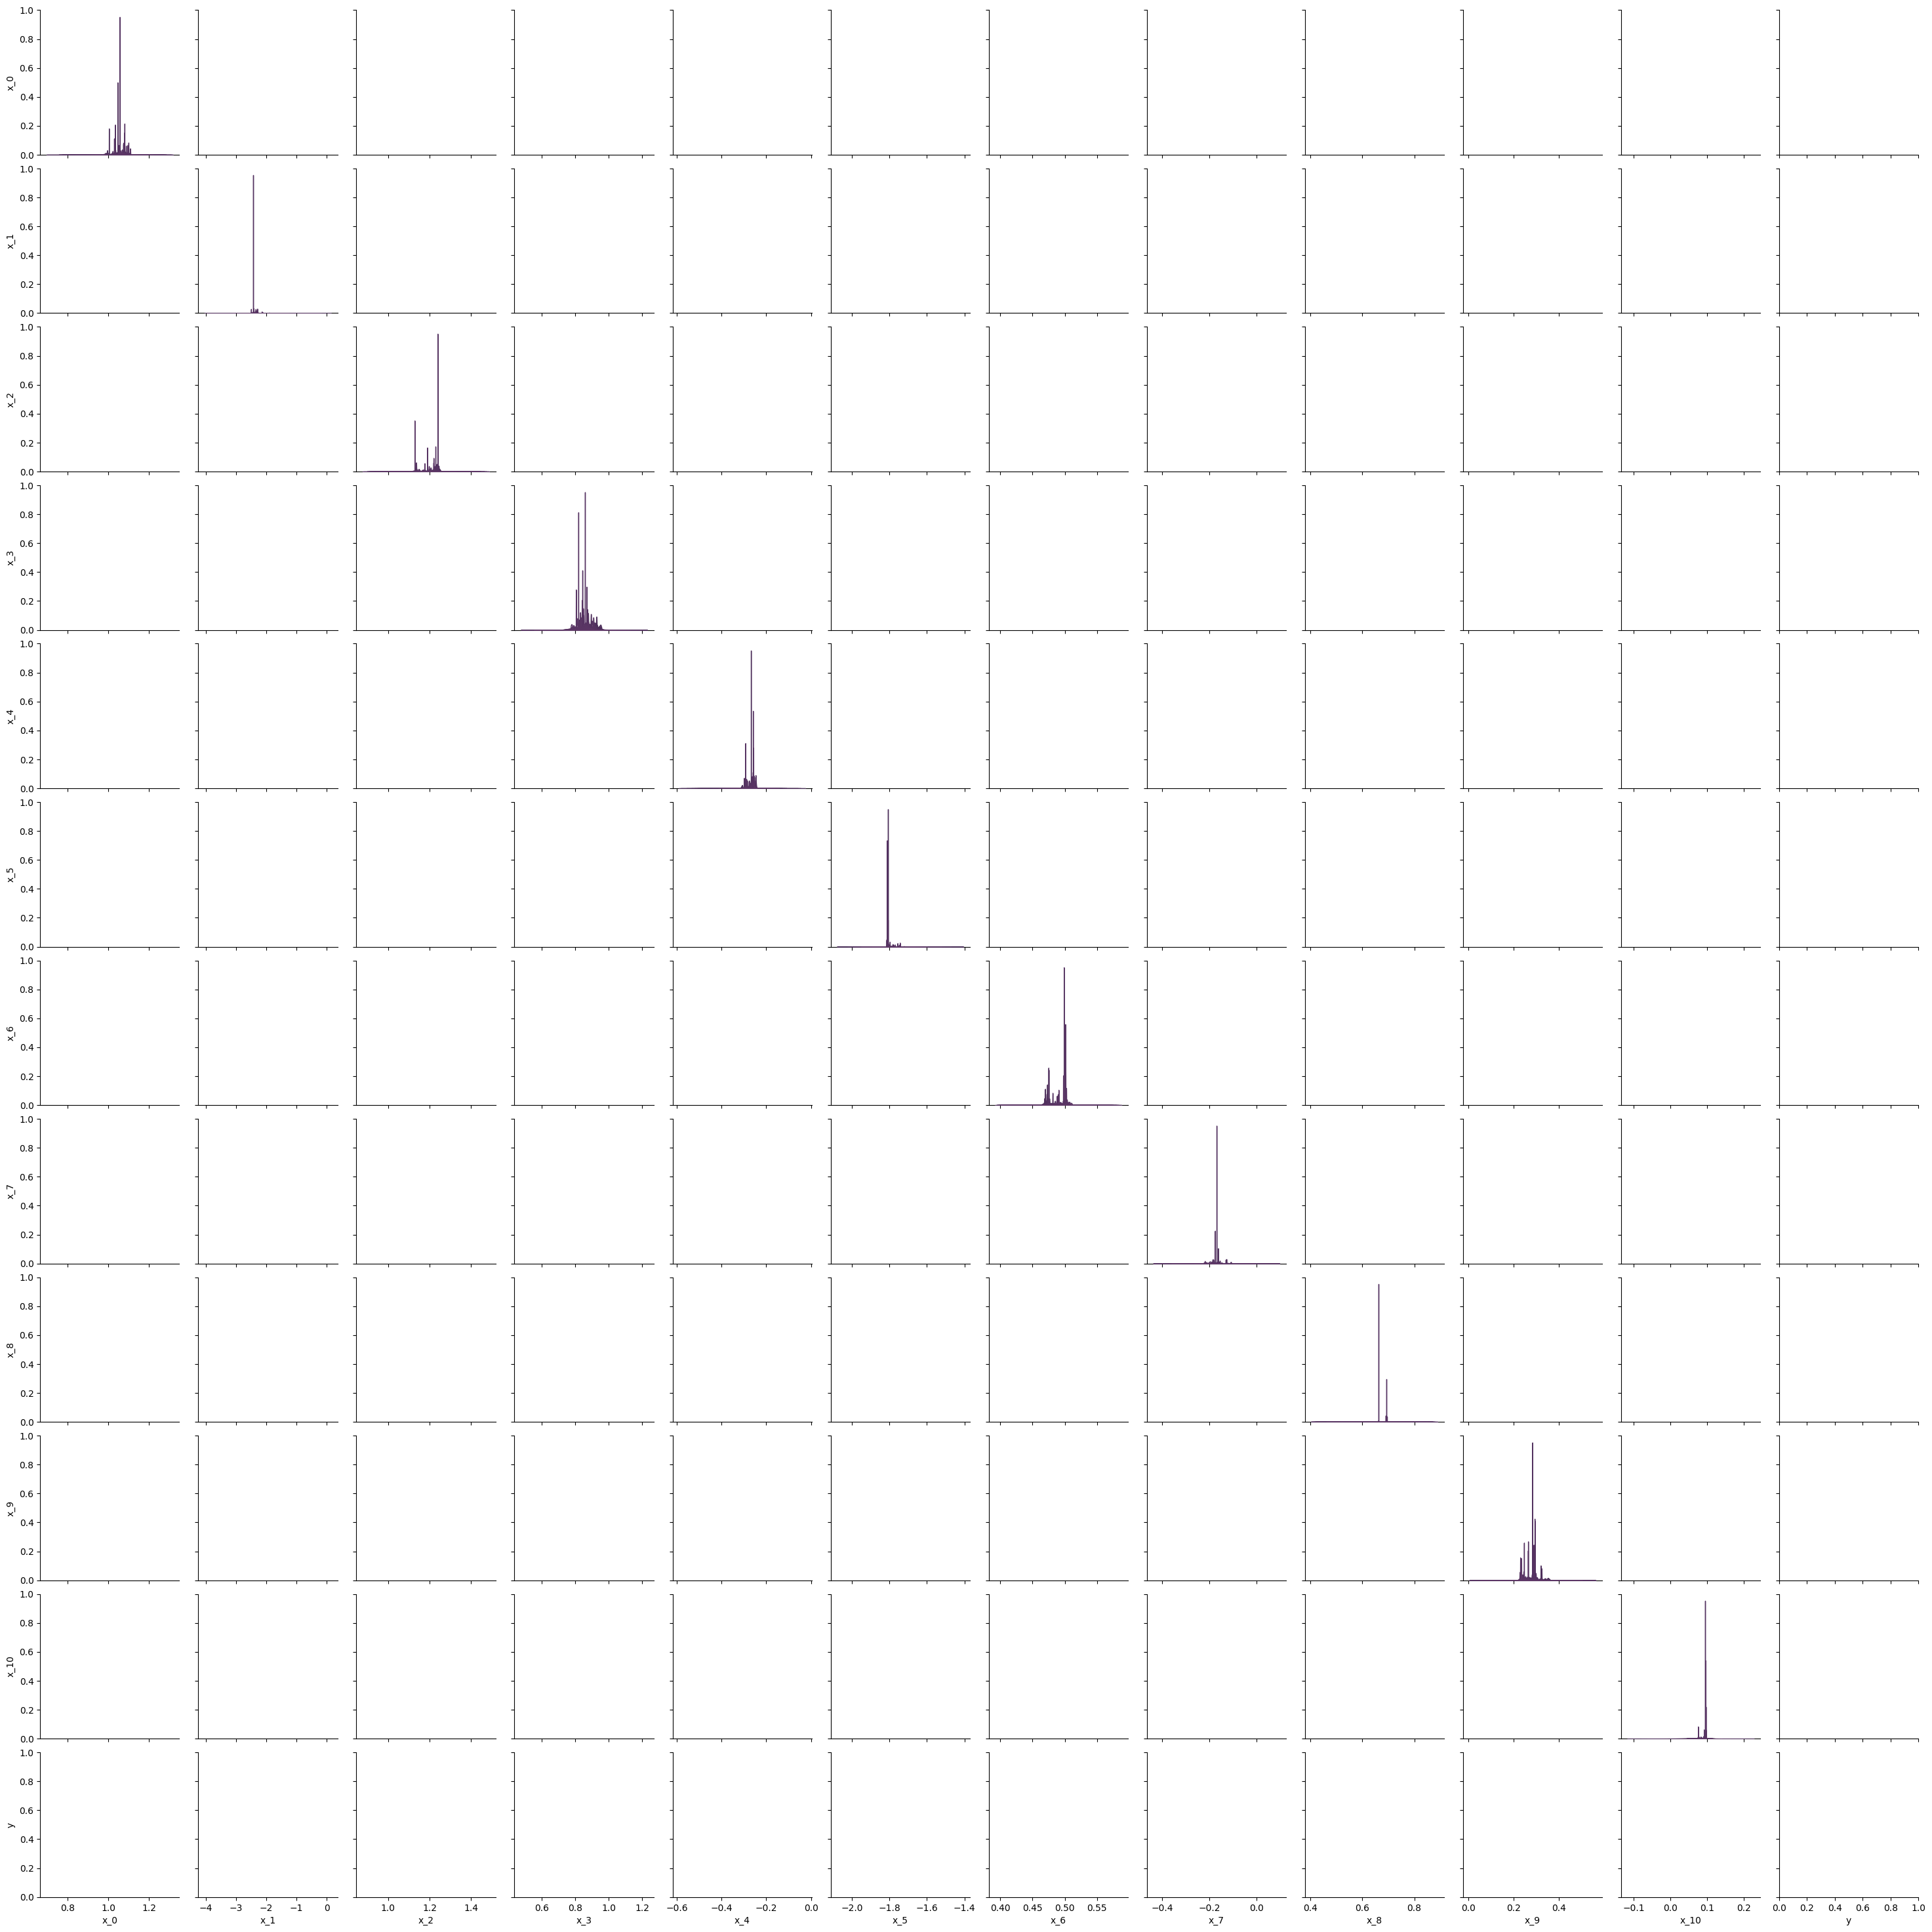

In [25]:
# calculate the correlation matrix
corr_matrix = train.corr()
print('X와 y의 상관 관계')
print(corr_matrix['y'].sort_values(ascending=True))

# visualize the correlation matrix
plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm')
plt.title('CorrelationMatrix')
plt.show()

# pairplot to visualize scatter plots betwwen 'y' and other variables
sns.pairplot(train,vars=train.columns, diag_kind='kde', kind='scatter', hue='y')
plt.show()